In [12]:
################################## MODIFY PATHS TO RUN THE NOTEBOOK #########################################
data_folder = '/content/drive/Othercomputers/My Laptop/סמסטר א/למידה חישובית למדעי המוח/final project/data/'
code_folder = '/content/drive/Othercomputers/My Laptop/סמסטר א/למידה חישובית למדעי המוח/final project/code/'
##############################################################################################################

# mount drive:
from google.colab import drive
drive.mount('/content/drive')


# imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sk:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# xgb:
from xgboost import XGBRegressor

# utilities:
from copy import deepcopy
from itertools import product
import pickle
from google.colab import drive

# custom functions:
import sys
sys.path.append(code_folder)
from ml_final_project_functions import plot_predictions, grid_search

################################################################################

# data:

# unpack original data pkl - v1:
with open(data_folder + 'processed_data_v1.pkl', 'rb') as f:
    data = pickle.load(f)
X_train_v1, X_val_v1, X_test_v1  = data['X_train'], data['X_val'], data['X_test']
y_train, y_val, y_test = data['y_train'], data['y_val'], data['y_test']

# unpack pca pkl - v3:
with open(data_folder + 'processed_data_v3.pkl', 'rb') as f:
    data = pickle.load(f)
X_train_v3, X_val_v3, X_test_v3  = data['X_train'], data['X_val'], data['X_test']

# unpack pca pkl - v4:
with open(data_folder + 'processed_data_v4.pkl', 'rb') as f:
    data = pickle.load(f)
X_train_v4, X_val_v4, X_test_v4  = data['X_train'], data['X_val'], data['X_test']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


fitting 96 hyperparameters combinations
iteration number 5
iteration number 10
iteration number 15
iteration number 20
iteration number 25
iteration number 30
iteration number 35
iteration number 40
iteration number 45
iteration number 50
iteration number 55
iteration number 60
iteration number 65
iteration number 70
iteration number 75
iteration number 80
iteration number 85
iteration number 90
iteration number 95

best mse is 31533.11
best params:
 (('n_estimators', 200), ('learning_rate', 0.01), ('min_child_weight', 500), ('gamma', 10), ('reg_alpha', 0), ('reg_lambda', 0), ('subsample', 1.0), ('colsample_bytree', 0.75), ('max_depth', 10))


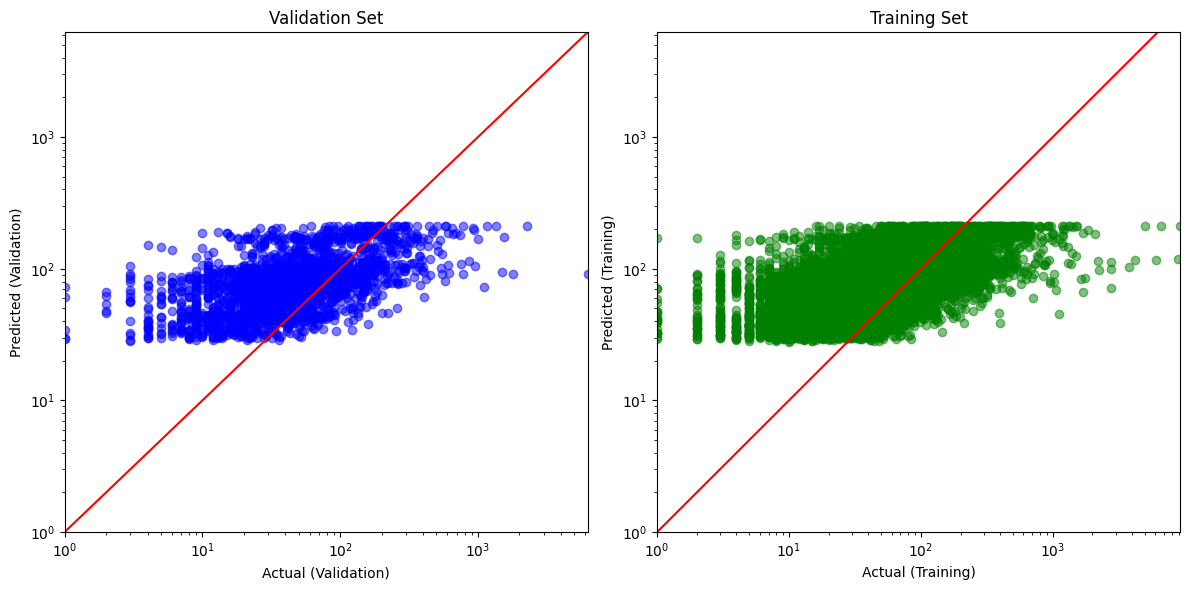

In [17]:
xgb = XGBRegressor(objective = 'reg:squarederror', seed = 42, enable_categorical=True)

param_grid = {
        'n_estimators': [100, 200],
        'learning_rate': [0.01],
        'min_child_weight': [500,1000],
        'gamma': [10,25,50],
        'reg_alpha': [0.1,0],
        'reg_lambda': [0.1,0],
        'subsample': [0.75, 1.],
        'colsample_bytree': [0.75],
        'max_depth': [10],
        }

# turn X to floats:
X_train_v4 = X_train_v4.astype(float)
X_val_v4 = X_val_v4.astype(float)

# run grid search:
results, best_model = grid_search(param_grid, xgb, X_train_v4, y_train, X_val_v4, y_val, 5)

# plot results:
plot_predictions(y_train, best_model.predict(X_train_v4), y_val, best_model.predict(X_val_v4))

In [16]:
results

,params,r2 train,mse train,r2 val,mse val
49,"((n_estimators, 200), (learning_rate, 0.01), (...",0.090693,43039.286497,0.089456,31533.408223
65,"((n_estimators, 200), (learning_rate, 0.01), (...",0.090693,43039.286497,0.089456,31533.408223
57,"((n_estimators, 200), (learning_rate, 0.01), (...",0.090693,43039.286497,0.089456,31533.408223
67,"((n_estimators, 200), (learning_rate, 0.01), (...",0.090718,43038.113126,0.089109,31545.435485
59,"((n_estimators, 200), (learning_rate, 0.01), (...",0.090718,43038.113126,0.089109,31545.435485
...,...,...,...,...,...
34,"((n_estimators, 100), (learning_rate, 0.01), (...",0.052806,44832.575571,0.058991,32588.478192
42,"((n_estimators, 100), (learning_rate, 0.01), (...",0.052806,44832.575571,0.058991,32588.478192
30,"((n_estimators, 100), (learning_rate, 0.01), (...",0.052805,44832.595569,0.058990,32588.494001
38,"((n_estimators, 100), (learning_rate, 0.01), (...",0.052805,44832.595569,0.058990,32588.494001
